In [23]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in csv
data_df = pd.read_csv("../../Project-1_Resources/Output/clean_data.csv",
                      low_memory = False, index_col = "Unnamed: 0")

In [3]:
data_df['DR_ER'] = np.nan
data_df.loc[(data_df['ER_VISIT']=="Y")|(data_df['OFC_VISIT']=="Y")|(data_df['ER_ED_VISIT']=="Y"), 'DR_ER'] = 'Y'
data_df.drop(columns=['ER_VISIT', 'OFC_VISIT', 'ER_ED_VISIT'], inplace=True)

In [44]:
#eliminate x_stay, DR_ER
# reaction_df = data_df[["DR_ER", "HOSPITAL", "X_STAY", "L_THREAT", "DIED", "DISABLE", "VAX_TYPE"]]
# reaction_df.head()
reaction_df = data_df[["L_THREAT", "DISABLE", "DIED", "VAX_TYPE"]]
reaction_df.head()

,L_THREAT,DISABLE,DIED,VAX_TYPE
0,NaN,NaN,NaN,HPV4
1,NaN,NaN,NaN,FLU3
2,NaN,NaN,NaN,PPV
3,NaN,NaN,NaN,VARZOS
4,NaN,NaN,NaN,FLU3


In [45]:
reaction_df.dtypes

L_THREAT    object
DISABLE     object
DIED        object
VAX_TYPE    object
dtype: object

In [46]:
##Vaccine by type df##

In [47]:
covid_df = data_df.loc[data_df["VAX_TYPE"] == "COVID19"]
covid_df.tail()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,DISABLE,RECOVD,NUMDAYS,FORM_VERS,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,DR_ER
603024,1442854,07/02/2021,FL,17,F,NaN,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,2,NaN
603025,1442855,07/02/2021,RI,52,F,NaN,NaN,NaN,NaN,NaN,...,NaN,N,88.0,2,chlorhexidine scrub (rash),07/02/2021,COVID19,PFIZER\BIONTECH,1,Y
603026,1442856,07/02/2021,CA,37,F,NaN,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,1,NaN
603027,1442857,07/02/2021,DE,69,F,NaN,NaN,NaN,Y,NaN,...,NaN,N,4.0,2,None known,07/02/2021,COVID19,PFIZER\BIONTECH,2,Y
603028,1442858,07/02/2021,ME,46,F,NaN,NaN,NaN,NaN,NaN,...,NaN,U,0.0,2,Sulfa & penicillin,07/02/2021,COVID19,JANSSEN,UNK,NaN


In [48]:
hpv_df = data_df.loc[data_df["VAX_TYPE"] == "HPV4"]
hpv_df.tail()


,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,DISABLE,RECOVD,NUMDAYS,FORM_VERS,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,DR_ER
282509,983756,01/28/2021,FL,34,F,NaN,NaN,NaN,Y,3.0,...,NaN,N,943.0,2,"Silicone, Aluminum,",01/28/2021,HPV4,MERCK & CO. INC.,UNK,Y
283635,985343,01/29/2021,CA,14,M,NaN,NaN,NaN,NaN,NaN,...,Y,N,NaN,2,NaN,01/29/2021,HPV4,MERCK & CO. INC.,2,NaN
312929,1030263,02/11/2021,SC,14,F,NaN,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,NKA,02/11/2021,HPV4,MERCK & CO. INC.,2,Y
313067,1025099,02/12/2021,CA,12,F,NaN,NaN,NaN,NaN,NaN,...,Y,N,NaN,2,NaN,02/12/2021,HPV4,MERCK & CO. INC.,2,Y
411334,1153067,03/31/2021,OH,14,F,NaN,NaN,NaN,NaN,NaN,...,NaN,Y,NaN,2,NaN,03/30/2021,HPV4,MERCK & CO. INC.,UNK,NaN


In [49]:
ppv_df = data_df.loc[data_df["VAX_TYPE"] == "PPV"]
ppv_df.tail()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,DISABLE,RECOVD,NUMDAYS,FORM_VERS,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,DR_ER
465334,1219699,04/16/2021,MD,60,F,NaN,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,sulfa,04/16/2021,PPV,MERCK & CO. INC.,UNK,NaN
477509,1234798,04/20/2021,NV,25,F,NaN,NaN,NaN,NaN,NaN,...,NaN,U,0.0,2,NaN,04/20/2021,PPV,MERCK & CO. INC.,1,NaN
478562,1236776,04/21/2021,MA,38,F,NaN,NaN,NaN,NaN,NaN,...,NaN,U,0.0,2,Unknown,04/21/2021,PPV,MERCK & CO. INC.,1,NaN
484928,1245344,04/23/2021,CA,26,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2,NaN,04/23/2021,PPV,MERCK & CO. INC.,UNK,NaN
541777,1327002,05/18/2021,WV,67,M,Y,05/18/2021,NaN,NaN,NaN,...,NaN,N,0.0,2,NaN,05/18/2021,PPV,MERCK & CO. INC.,UNK,Y


In [50]:
var_df = data_df.loc[data_df["VAX_TYPE"] == "VARZOS"]
var_df.tail()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,DISABLE,RECOVD,NUMDAYS,FORM_VERS,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,DR_ER
584321,1405221,06/17/2021,GA,72,F,NaN,NaN,NaN,NaN,NaN,...,NaN,N,181.0,2,NaN,06/16/2021,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,NaN
586605,1409851,06/18/2021,LA,67,F,NaN,NaN,NaN,NaN,NaN,...,NaN,U,NaN,2,NaN,06/18/2021,VARZOS,MERCK & CO. INC.,UNK,Y
586606,1409852,06/18/2021,AL,59,U,NaN,NaN,NaN,NaN,NaN,...,NaN,U,NaN,2,NaN,06/18/2021,VARZOS,MERCK & CO. INC.,UNK,Y
587623,1412205,06/19/2021,VA,53,F,NaN,NaN,NaN,NaN,NaN,...,NaN,N,46.0,2,NaN,06/18/2021,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,1,NaN
590636,1416954,06/22/2021,CO,67,F,NaN,NaN,Y,Y,17.0,...,NaN,N,24.0,2,NaN,06/22/2021,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,NaN


In [51]:
flu_df = data_df.loc[data_df["VAX_TYPE"] == "FLU3"]
flu_df.tail()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,DISABLE,RECOVD,NUMDAYS,FORM_VERS,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,DR_ER
253263,945747,01/15/2021,UT,15,M,NaN,NaN,NaN,NaN,NaN,...,NaN,N,NaN,2,NaN,01/14/2021,FLU3,GLAXOSMITHKLINE BIOLOGICALS,UNK,NaN
257748,952051,01/18/2021,VA,19,F,NaN,NaN,NaN,NaN,NaN,...,NaN,U,3.0,2,NaN,01/18/2021,FLU3,SANOFI PASTEUR,UNK,Y
310717,1022156,02/11/2021,MI,22,F,NaN,NaN,NaN,NaN,NaN,...,NaN,U,0.0,2,NaN,02/11/2021,FLU3,SANOFI PASTEUR,UNK,NaN
336900,1057901,02/26/2021,NaN,49,M,NaN,NaN,NaN,Y,1.0,...,Y,N,NaN,2,NaN,02/26/2021,FLU3,CSL LIMITED,UNK,Y
531366,1311303,05/12/2021,MI,40,F,NaN,NaN,NaN,NaN,NaN,...,Y,N,14.0,2,"Iodine, Shellfish",05/12/2021,FLU3,NOVARTIS VACCINES AND DIAGNOSTICS,UNK,Y


In [52]:
vax_group = reaction_df.groupby(["VAX_TYPE"])

vax_group = vax_group.count()
# vax_group = vax_group.value_counts()

In [53]:
# vax_group.value_counts()
vax_group.head()

,L_THREAT,DISABLE,DIED
VAX_TYPE,,,
6VAX-F,0,1,0
ADEN_4_7,4,4,1
ANTH,60,121,4
BCG,1,1,1
CHOL,0,1,0


In [54]:
vax_study_group = vax_group.loc[["COVID19", "HPV4", "PPV", "VARZOS", "FLU3"]]
vax_study_group


,L_THREAT,DISABLE,DIED
VAX_TYPE,,,
COVID19,6559,5338,4856
HPV4,159,285,37
PPV,120,185,27
VARZOS,246,649,70
FLU3,734,721,134


In [55]:
covid_study = vax_group.loc[["COVID19"]]
covid_study

,L_THREAT,DISABLE,DIED
VAX_TYPE,,,
COVID19,6559,5338,4856


In [56]:
hpv4_study = vax_group.loc[["HPV4"]]
hpv4_study

,L_THREAT,DISABLE,DIED
VAX_TYPE,,,
HPV4,159,285,37


In [57]:
ppv_study = vax_group.loc[["PPV"]]
ppv_study

,L_THREAT,DISABLE,DIED
VAX_TYPE,,,
PPV,120,185,27


In [58]:
varzos_study = vax_group.loc[["VARZOS"]]
varzos_study

,L_THREAT,DISABLE,DIED
VAX_TYPE,,,
VARZOS,246,649,70


In [59]:
flu3_study = vax_group.loc[["FLU3"]]
flu3_study

,L_THREAT,DISABLE,DIED
VAX_TYPE,,,
FLU3,734,721,134


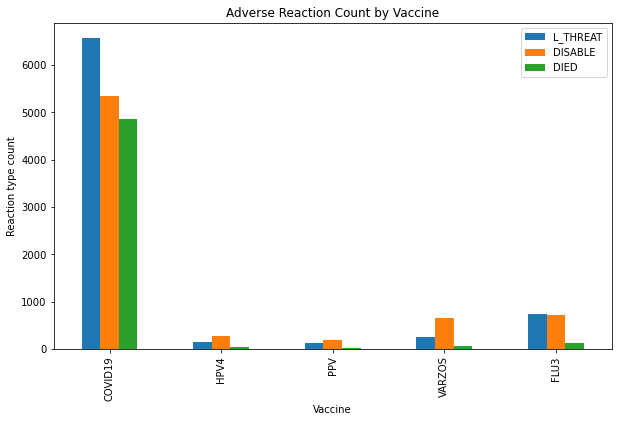

In [62]:
df_vax = vax_study_group.plot(kind = "bar",
                    figsize = (10, 6),
                    )
#labels
df_vax.set_xlabel("Vaccine")
df_vax.set_ylabel("Reaction type count")
df_vax.set_title("Adverse Reaction Count by Vaccine")

plt.savefig("../Adverse Reaction/Bar Graph Output/all_vaxs")

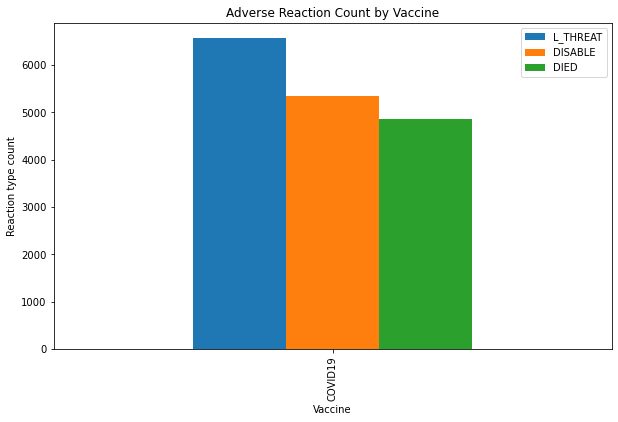

In [63]:
df_covid = covid_study.plot(kind = "bar",
                figsize = (10, 6),
                )
#labels
df_covid.set_xlabel("Vaccine")
df_covid.set_ylabel("Reaction type count")
df_covid.set_title("Adverse Reaction Count by Vaccine")

plt.savefig("../Adverse Reaction/Bar Graph Output/covid")

In [ ]:
df_hpv4 = hpv4_study.plot(kind = "bar",
               figsize = (10, 6),
               )
#labels
df_hpv4.set_xlabel("Vaccine")
df_hpv4.set_ylabel("Reaction type count")
df_hpv4.set_title("Adverse Reaction Count by Vaccine")

In [ ]:
df_ppv = ppv_study.plot(kind = "bar",
              figsize = (10, 6),
              )
#labels
df_ppv.set_xlabel("Vaccine")
df_ppv.set_ylabel("Reaction type count")
df_ppv.set_title("Adverse Reaction Count by Vaccine")

In [ ]:
df_varzos = varzos_study.plot(kind = "bar",
                 figsize = (10, 6),
                 )
#labels
df_varzos.set_xlabel("Vaccine")
df_varzos.set_ylabel("Reaction type count")
df_varzos.set_title("Adverse Reaction Count by Vaccine")

In [ ]:
df_flu3 = flu3_study.plot(kind = "bar",
               figsize = (10, 6),
               )
#labels
df_flu3.set_xlabel("Vaccine")
df_flu3.set_ylabel("Reaction type count")
df_flu3.set_title("Adverse Reaction Count by Vaccine")

In [ ]:

vax_df = vax_study_group.groupby("VAX_TYPE")

vax_mean = vax_df['DIED'].mean()
vax_median = vax_df['DIED'].median()
vax_sum = vax_df['DIED'].sum()


vax_df_summary = pd.DataFrame({'Mean': vax_mean, 'Median': vax_median, 'Sum': vax_sum})
vax_df_summary

In [ ]:
vax_df_summary.describe()

In [ ]:
vax_df['DIED'].describe()

In [ ]:
reaction_df.describe()

In [ ]:
vax_study_group.info

In [ ]:
vax_study_group.sum()